In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
df = df.drop('Surname', axis=1)

In [ ]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X= df.drop("Exited",axis="columns")
y= df["Exited"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

Y_pred = lr.predict(X_test)

acc_log = round(lr.score(X_train, y_train) * 100, 2)

acc_log

14.64

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, Y_pred)

0.7925

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx_nb =confusion_matrix(y_test, Y_pred)

conf_mtx_nb

array([[1585,    0],
       [ 415,    0]])

In [ ]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(LogisticRegression(),X,y,cv=10,scoring="accuracy"))

0.7962999999999999

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print(f"Model Precision: {precision_score(y_test, Y_pred)}")
print(f"Model Recall: {recall_score(y_test, Y_pred)}")
print(f"Model F1-score: {f1_score(y_test, Y_pred)}")

Model Precision: 0.0
Model Recall: 0.0
Model F1-score: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholdsh = roc_curve(y_test, Y_pred)

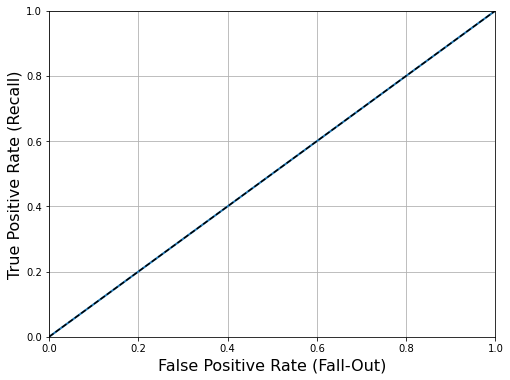

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, Y_pred)

0.5

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier()

classifier.fit(X_train, y_train)

Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, Y_pred)

0.86

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx_nb = confusion_matrix(y_test, Y_pred)

conf_mtx_nb

array([[1545,   40],
       [ 240,  175]])

In [ ]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=10,scoring="accuracy"))


0.8626000000000001

In [ ]:
print(f"Model Precision: {precision_score(y_test, Y_pred)}")
print(f"Model Recall: {recall_score(y_test, Y_pred)}")
print(f"Model F1-score: {f1_score(y_test, Y_pred)}")

Model Precision: 0.813953488372093
Model Recall: 0.42168674698795183
Model F1-score: 0.5555555555555556


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholdsh = roc_curve(y_test, Y_pred)

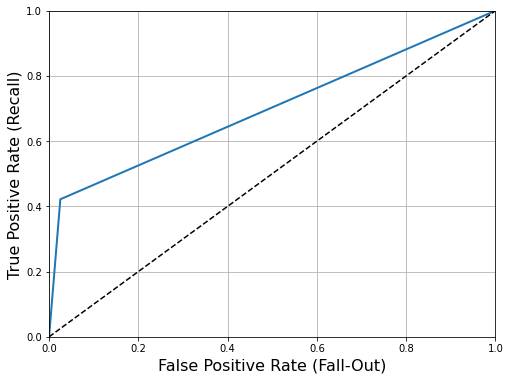

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, Y_pred)

0.6982250769640074

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

Y_pred = gaussian.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, Y_pred)

0.781

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx_nb = confusion_matrix(y_test, Y_pred)

conf_mtx_nb

array([[1536,   49],
       [ 389,   26]])

In [ ]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(GaussianNB(),X,y,cv=10,scoring="accuracy"))

0.7842

In [ ]:
print(f"Model Precision: {precision_score(y_test, Y_pred)}")
print(f"Model Recall: {recall_score(y_test, Y_pred)}")
print(f"Model F1-score: {f1_score(y_test, Y_pred)}")

Model Precision: 0.3466666666666667
Model Recall: 0.06265060240963856
Model F1-score: 0.10612244897959185


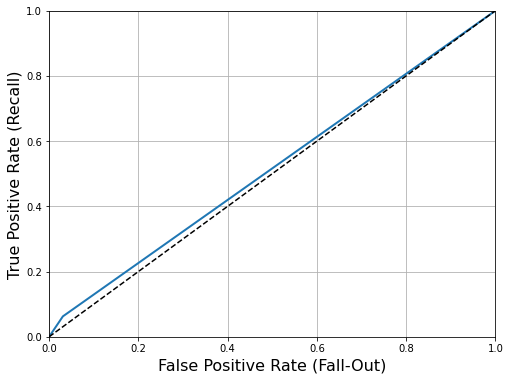

In [ ]:
fpr, tpr, thresholdsh = roc_curve(y_test, Y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [ ]:
roc_auc_score(y_test, Y_pred)

0.5158678879556079

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, Y_pred)

0.8565

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx_nb = confusion_matrix(y_test, Y_pred)

conf_mtx_nb

array([[1521,   64],
       [ 223,  192]])

In [ ]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(AdaBoostClassifier(),X,y,cv=10,scoring="accuracy"))

0.8506

In [ ]:
print(f"Model Precision: {precision_score(y_test, Y_pred)}")
print(f"Model Recall: {recall_score(y_test, Y_pred)}")
print(f"Model F1-score: {f1_score(y_test, Y_pred)}")

Model Precision: 0.75
Model Recall: 0.46265060240963857
Model F1-score: 0.5722801788375559


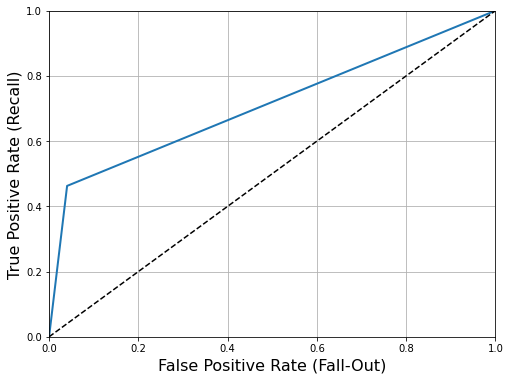

In [ ]:
fpr, tpr, thresholdsh = roc_curve(y_test, Y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [ ]:
roc_auc_score(y_test, Y_pred)

0.7111360267568697

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, Y_pred)

0.857

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx_nb = confusion_matrix(y_test, Y_pred)

conf_mtx_nb

array([[1519,   66],
       [ 220,  195]])

In [ ]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(GradientBoostingClassifier(),X,y,cv=10,scoring="accuracy"))

0.8614

In [ ]:
print(f"Model Precision: {precision_score(y_test, Y_pred)}")
print(f"Model Recall: {recall_score(y_test, Y_pred)}")
print(f"Model F1-score: {f1_score(y_test, Y_pred)}")

Model Precision: 0.7471264367816092
Model Recall: 0.46987951807228917
Model F1-score: 0.576923076923077


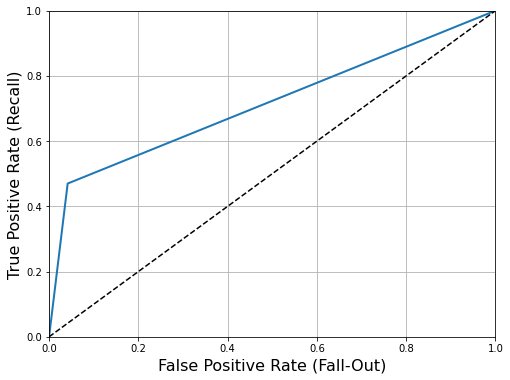

In [ ]:
fpr, tpr, thresholdsh = roc_curve(y_test, Y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [ ]:
roc_auc_score(y_test, Y_pred)

0.7141195697616967

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, Y_pred)

0.7965

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx_nb = confusion_matrix(y_test, Y_pred)

conf_mtx_nb

array([[1364,  221],
       [ 186,  229]])

In [ ]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring="accuracy"))


0.7886000000000001

In [ ]:
print(f"Model Precision: {precision_score(y_test, Y_pred)}")
print(f"Model Recall: {recall_score(y_test, Y_pred)}")
print(f"Model F1-score: {f1_score(y_test, Y_pred)}")

Model Precision: 0.5088888888888888
Model Recall: 0.5518072289156627
Model F1-score: 0.5294797687861272


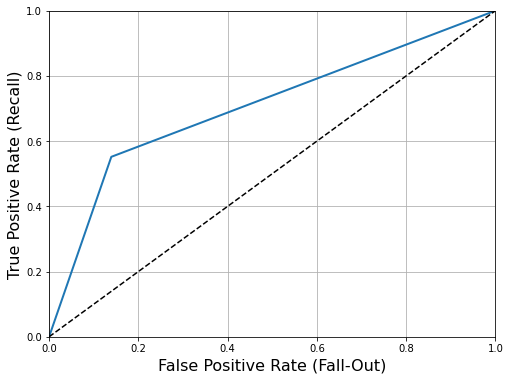

In [ ]:
fpr, tpr, thresholdsh = roc_curve(y_test, Y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [ ]:
roc_auc_score(y_test, Y_pred)

0.7061875261297555

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, Y_pred)

0.74

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx_nb = confusion_matrix(y_test, Y_pred)

conf_mtx_nb

array([[1423,  162],
       [ 358,   57]])

In [ ]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(KNeighborsClassifier(),X,y,cv=10,scoring="accuracy"))

0.7618

In [ ]:
print(f"Model Precision: {precision_score(y_test, Y_pred)}")
print(f"Model Recall: {recall_score(y_test, Y_pred)}")
print(f"Model F1-score: {f1_score(y_test, Y_pred)}")

Model Precision: 0.2602739726027397
Model Recall: 0.13734939759036144
Model F1-score: 0.17981072555205047


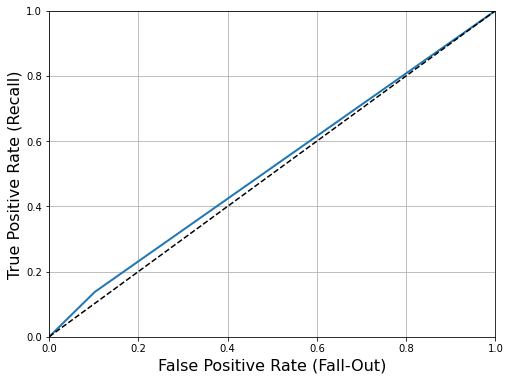

In [ ]:
fpr, tpr, thresholdsh = roc_curve(y_test, Y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [ ]:
roc_auc_score(y_test, Y_pred)

0.5175705978488084

In [ ]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)

clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

clf3 =  KNeighborsClassifier(n_neighbors=3)

In [ ]:
eclf1 = VotingClassifier(estimators=[
...         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

In [ ]:
eclf1 = eclf1.fit(X_train, y_train)

In [ ]:
Y_pred = eclf1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, Y_pred)

0.804

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx_nb = confusion_matrix(y_test, Y_pred)

conf_mtx_nb

array([[1578,    7],
       [ 385,   30]])

In [ ]:
print(f"Model Precision: {precision_score(y_test, Y_pred)}")
print(f"Model Recall: {recall_score(y_test, Y_pred)}")
print(f"Model F1-score: {f1_score(y_test, Y_pred)}")

Model Precision: 0.8108108108108109
Model Recall: 0.07228915662650602
Model F1-score: 0.1327433628318584


In [ ]:
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft')

In [ ]:
eclf2 = eclf2.fit(X_train, y_train)

In [ ]:
Y_pred = eclf2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, Y_pred)

0.805

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx_nb = confusion_matrix(y_test, Y_pred)

conf_mtx_nb

array([[1579,    6],
       [ 384,   31]])

In [ ]:
print(f"Model Precision: {precision_score(y_test, Y_pred)}")
print(f"Model Recall: {recall_score(y_test, Y_pred)}")
print(f"Model F1-score: {f1_score(y_test, Y_pred)}")

Model Precision: 0.8378378378378378
Model Recall: 0.0746987951807229
Model F1-score: 0.13716814159292037


In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

Y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, Y_pred)

0.7925

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx_nb = confusion_matrix(y_test, Y_pred)

conf_mtx_nb

array([[1585,    0],
       [ 415,    0]])

In [ ]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(SVC(),X,y,cv=10,scoring="accuracy"))

0.7962999999999999

In [ ]:
print(f"Model Precision: {precision_score(y_test, Y_pred)}")
print(f"Model Recall: {recall_score(y_test, Y_pred)}")
print(f"Model F1-score: {f1_score(y_test, Y_pred)}")

Model Precision: 0.0
Model Recall: 0.0
Model F1-score: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


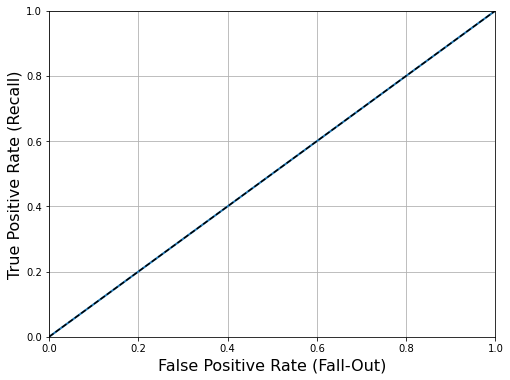

In [ ]:
fpr, tpr, thresholdsh = roc_curve(y_test, Y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [ ]:
roc_auc_score(y_test, Y_pred)

0.5